In [67]:
#import packages
import pandas as pd
import seaborn as sns
import re as re
import numpy as np

#to make sure i see everything 
#pd.set_option("display.max_colwidth", -1)

In [68]:
df=pd.read_csv("wine.csv")
url="https://raw.githubusercontent.com/murpi/wilddata/master/domaine_des_croix.csv"
wine_info=pd.read_csv(url)

In [69]:
#client assortment
wine_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                14 non-null     object 
 1   description            14 non-null     object 
 2   designation            9 non-null      object 
 3   points                 14 non-null     int64  
 4   price                  0 non-null      float64
 5   province               14 non-null     object 
 6   region_1               14 non-null     object 
 7   region_2               0 non-null      float64
 8   taster_name            14 non-null     object 
 9   taster_twitter_handle  14 non-null     object 
 10  title                  14 non-null     object 
 11  variety                14 non-null     object 
 12  winery                 14 non-null     object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.5+ KB


In [70]:
wine_info["winery"].unique()

array(['Domaine des Croix'], dtype=object)

The client assortment has the following characteristics: 
- 14 distinct products, 13 are "Pinot Noir" and only one from the "Chardonnay" variety
- all wines are from France, from the province of Burgundy and produced in the winery "Domaine des Croix"
- wines come from 5 different region_1 areas, but mainly from Beaune and Corton (Corton, Corton-Gréves, Corton-Charlemagne)
- 14 wines with 13 distinct descriptions -> go check which one is the same, potencial problem 
- only 9 wines have a designation, the missing 5 are Nan -> check why, and if one of them is the one with missing description
- "points" vary between 90 and 95 (inclusive). Where Pinoit Noir has a mean score of 92.769231 and Chardonnay of 95 
- they only have one taster_name (Roger Voss) 

In [71]:
wine_info.head(15)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix
1,France,A rich wine with great fruits as well as struc...,La Vigne au Saint,94,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 La Vigne au Saint (Cor...,Pinot Noir,Domaine des Croix
2,France,"A perfumed village wine, this is made from fou...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Beaune,Pinot Noir,Domaine des Croix
3,France,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Beaune,Pinot Noir,Domaine des Croix
4,France,This wine is perfumed with cherries and red be...,Les Grèves Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 Les Grèves Premier Cru ...,Pinot Noir,Domaine des Croix
5,France,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2015 Beaune,Pinot Noir,Domaine des Croix
6,France,"While this wine is firm, with some fine tannin...",Les Cent-Vignes Premier Cru,93,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 Les Cent-Vignes Premier...,Pinot Noir,Domaine des Croix
7,France,This wine has a smoky character that gives an ...,Grèves,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Grèves (Corton),Pinot Noir,Domaine des Croix
8,France,"Dark fruit backs up the dense, dark and firm c...",La Vigne au Saint,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 La Vigne au Saint (Cor...,Pinot Noir,Domaine des Croix
9,France,"A fine, mineral, structured wine with a very d...",Bressandes Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Bressandes Premier Cru ...,Pinot Noir,Domaine des Croix


In [72]:
wine_var_points = wine_info.pivot_table(values="points", index="variety", aggfunc={"mean", "count"})
wine_var_points


,count,mean
variety,,
Chardonnay,1,95.000000
Pinot Noir,13,92.769231


In [73]:
wine_region1_points= wine_info.pivot_table(values="points", index="region_1", columns="variety",fill_value=0,aggfunc="mean")
wine_region1_points.sort_values(by=["Pinot Noir"], ascending=False, inplace=True)
wine_region1_points

variety,Chardonnay,Pinot Noir
region_1,,
Corton,0,94.666667
Corton Grèves,0,94.000000
Beaune,0,92.000000
Savigny-lès-Beaune,0,92.000000
Corton-Charlemagne,95,0.000000


The "title" column contains the wineray, vintage and the variety. You must isolate the vintage (year) in a dedicated column.
Example: "Domaine des Croix 2016 Corton Grèves"

Note: "Corton Gréves" is the variety which is already provided , some entries have extra information which is not relevant for the analysis 
Note 2: All entries start with "Domaine des Croix" which has 17 letters + space + yyyy + space = 23 "letters

In [74]:
wine_info["domain"] = wine_info["title"].apply(lambda x: x[23:])
wine_info["year"]=wine_info["title"].apply(lambda x: int("".join(filter(str.isdigit, x))))

In [75]:
wine_info.head(15)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,domain,year
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix,Corton Grèves,2016
1,France,A rich wine with great fruits as well as struc...,La Vigne au Saint,94,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 La Vigne au Saint (Cor...,Pinot Noir,Domaine des Croix,La Vigne au Saint (Corton),2017
2,France,"A perfumed village wine, this is made from fou...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Beaune,Pinot Noir,Domaine des Croix,Beaune,2016
3,France,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Beaune,Pinot Noir,Domaine des Croix,Beaune,2019
4,France,This wine is perfumed with cherries and red be...,Les Grèves Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 Les Grèves Premier Cru ...,Pinot Noir,Domaine des Croix,Les Grèves Premier Cru (Beaune),2017
5,France,"A structured wine, packed with red fruits and ...",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2015 Beaune,Pinot Noir,Domaine des Croix,Beaune,2015
6,France,"While this wine is firm, with some fine tannin...",Les Cent-Vignes Premier Cru,93,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 Les Cent-Vignes Premier...,Pinot Noir,Domaine des Croix,Les Cent-Vignes Premier Cru (Beaune),2018
7,France,This wine has a smoky character that gives an ...,Grèves,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Grèves (Corton),Pinot Noir,Domaine des Croix,Grèves (Corton),2016
8,France,"Dark fruit backs up the dense, dark and firm c...",La Vigne au Saint,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 La Vigne au Saint (Cor...,Pinot Noir,Domaine des Croix,La Vigne au Saint (Corton),2018
9,France,"A fine, mineral, structured wine with a very d...",Bressandes Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Bressandes Premier Cru ...,Pinot Noir,Domaine des Croix,Bressandes Premier Cru (Beaune),2019


In [76]:
wine_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                14 non-null     object 
 1   description            14 non-null     object 
 2   designation            9 non-null      object 
 3   points                 14 non-null     int64  
 4   price                  0 non-null      float64
 5   province               14 non-null     object 
 6   region_1               14 non-null     object 
 7   region_2               0 non-null      float64
 8   taster_name            14 non-null     object 
 9   taster_twitter_handle  14 non-null     object 
 10  title                  14 non-null     object 
 11  variety                14 non-null     object 
 12  winery                 14 non-null     object 
 13  domain                 14 non-null     object 
 14  year                   14 non-null     int64  
dtypes: float

In [77]:
wine_year_points= wine_info.pivot_table(values="points", index="year", columns="variety",fill_value=0,aggfunc="mean")
wine_year_points

#the porpose is to see the evolution of the points aming the 2 varieties throughout the years 

variety,Chardonnay,Pinot Noir
year,,
2014,95,92.00
2015,0,90.00
2016,0,93.00
2017,0,94.00
2018,0,93.25
2019,0,92.00


In [78]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2017 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2017 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2016 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [79]:
df.info()
df.drop_duplicates(inplace=True)
#all varieties: 129.957 before removing duplicates, 115.653 after removing duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [80]:
pinot_weight= round((len(df[df["variety"]=="Pinot Noir"])/df.shape[0])*100,3)
print("In total The Pinot Noir Wines represent " + str(pinot_weight) + "% of the total sample")

In total The Pinot Noir Wines represent 10.224% of the total sample


In [81]:
df["year"]=df["title"].apply(lambda x: str("".join(filter(str.isdigit, x)))) #the dataset has 129.957 rows and tehre are no missing values in price

In [82]:
df["year"].unique() #problem, need to find a pattern: xx20-- or x20-- or 20--xx or 20--x 20-- 
unique_dates=set(df["year"])
#print(unique_dates)
#all dates with less than 4 numbers need to be dropped since it is impossible to take any information 

In [83]:
df["lenght_year"]=df.year.str.len()   #create a new column to see what is the length of "year"
df["lenght_year"].unique()           #the problem will be on years with length 0,1,2,3 so i will assign them as "strange"

array([ 4,  0,  6,  7,  8,  5, 11,  1,  2,  3, 12, 14,  9, 10],
      dtype=int64)

In [84]:
def set_date(my_dates):
    #print(my_dates)
    if len(my_dates) <=3:
        final_year="strange"
        #print(final_year + ":" + my_dates)
    elif len(my_dates)==4:
        if len(re.findall(r"(?:18|19|20)[0-9]{2}", my_dates)) !=0:
            final_year=my_dates
            #print(final_year +":" + my_dates)
        else:
            final_year="strange"
    else:
        if len(re.findall(r"(?:18|19|20)[0-9]{2}", my_dates)) !=0:
            final_year=re.search("(?:18|19|20)[0-9]{2}",my_dates).group(0)
            #print(final_year + ":" + my_dates)
        else:
            final_year="strange"
            #print(final_year + ":" + my_dates)
    return final_year

In [85]:
df["final_year"]=df["year"].apply(set_date)
df.drop(columns=["year", "lenght_year"], inplace=True)
df.rename(columns={"final_year":"year"}, inplace=True)
df["year"].unique()

array(['2017', '2015', '2016', '2014', '2011', '2013', '2012', '2018',
       '2019', 'strange', '2020', '2008', '2007', '2010', '2005', '2009',
       '2006', '1820', '1887', '2004', '2003', '1995', '2001', '2000',
       '1877', '2021', '1999', '1872', '1868', '1898', '1812', '2002',
       '1852', '1998', '1996', '1840', '1929', '1912', '1875', '1980',
       '1964', '1848', '1870', '1856', '1987', '1967', '1994', '1992',
       '1827', '1860', '1850', '2052', '1984', '1991', '1993', '1997',
       '1969', '1882', '1935', '1821', '1977', '1982', '1965', '1970',
       '1968', '1947', '1963', '1989', '1927', '1904', '1847', '1986',
       '1990', '1919', '1920', '1957', '1966', '1988', '1961', '1845',
       '1952', '1941', '1978', '1914', '1934', '1945'], dtype=object)

In [86]:
df=df[(df["year"]!="strange") & (df["year"] !="2052")]

#PRICE

In [87]:
df["price"].unique()  #have nan

array([  nan,   20.,   18.,   44.,   19.,   24.,   17.,   25.,   23.,
         27.,   29.,   22.,   31.,   28.,   21.,   36.,   51.,   16.,
         41.,   15.,   35.,   54.,   30.,   43.,   38.,   13.,   32.,
         46.,   49.,   47.,  100.,   95.,   50.,   52.,   55.,   60.,
         67.,   58.,   93.,   34.,   91.,   82.,   90.,   72.,  108.,
         65.,   85.,   56.,   61.,   53.,   42.,   33.,   66.,   57.,
         37.,   45.,   26.,   40.,   94.,   48.,   39.,  141.,   99.,
         69.,   64.,   10.,    7.,    9.,   14.,    6.,  320.,  123.,
        327.,  263.,  164.,   63.,  179.,   88.,  126.,  168.,  238.,
         71.,   62.,  110.,   81.,   74.,  106.,   59.,   73.,   77.,
         78.,   11.,   12.,   79.,   68.,   86.,  134.,  121.,   92.,
         84.,   80.,  103.,  104.,   76.,  130.,   89.,   70.,   97.,
       1337.,  292.,  107.,  146.,  194.,  190.,  132.,  785.,  220.,
        165.,   83.,  852.,  161.,  921.,  302.,   87.,  138.,  101.,
        119.,  148.,

In [88]:
price_nan=df["price"].isnull().sum() 
price_pinot_nan= len(df[(df["price"].isnull()) & (df["variety"]=="Pinot Noir")]) 
price_nan_weight = round((price_nan/df.shape[0])*100,3)
print("In total we have " + str(price_nan) + " wines without price, representing " + str(price_nan_weight) + "% of the total sample, which " + str(price_pinot_nan) + " are from the Pinot Noir variety")

In total we have 7945 wines without price, representing 6.866% of the total sample, which 431 are from the Pinot Noir variety


In [89]:
pinot_quant=len(df[df["variety"] == "Pinot Noir"])
quant_nan_pinot=round((price_pinot_nan/pinot_quant)*100,3)
quant_nan_all=round((price_pinot_nan/price_nan)*100,3)
print("In total, the Pinot Noir wines without price represent " + str(quant_nan_all) + "% of the total population of wines, which is " + str(quant_nan_pinot) + "% when only considering the Pinot Noir sample") 

In total, the Pinot Noir wines without price represent 5.425% of the total population of wines, which is 3.553% when only considering the Pinot Noir sample


Because the missing values reprsent less than 10% of the sample then I decide to replace them

C:\Users\joana\anaconda3\envs\project_nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

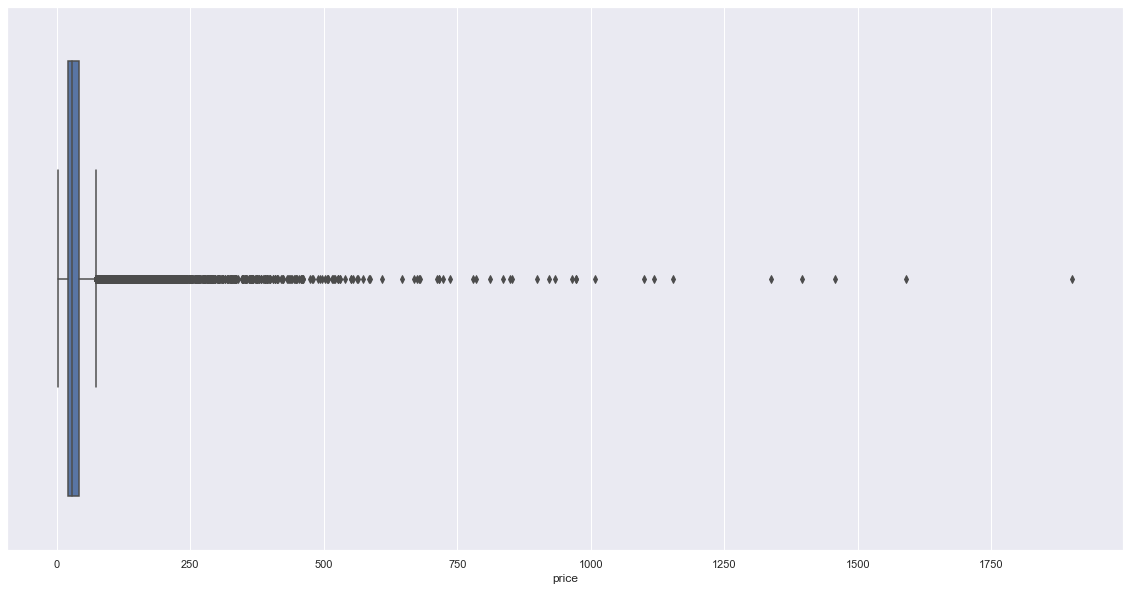

In [90]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(df.price)  
#conclusion: allot of outlier which have an impact on the mean. This indicates that using the mean to replace missing values is not a good ideia

C:\Users\joana\anaconda3\envs\project_nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

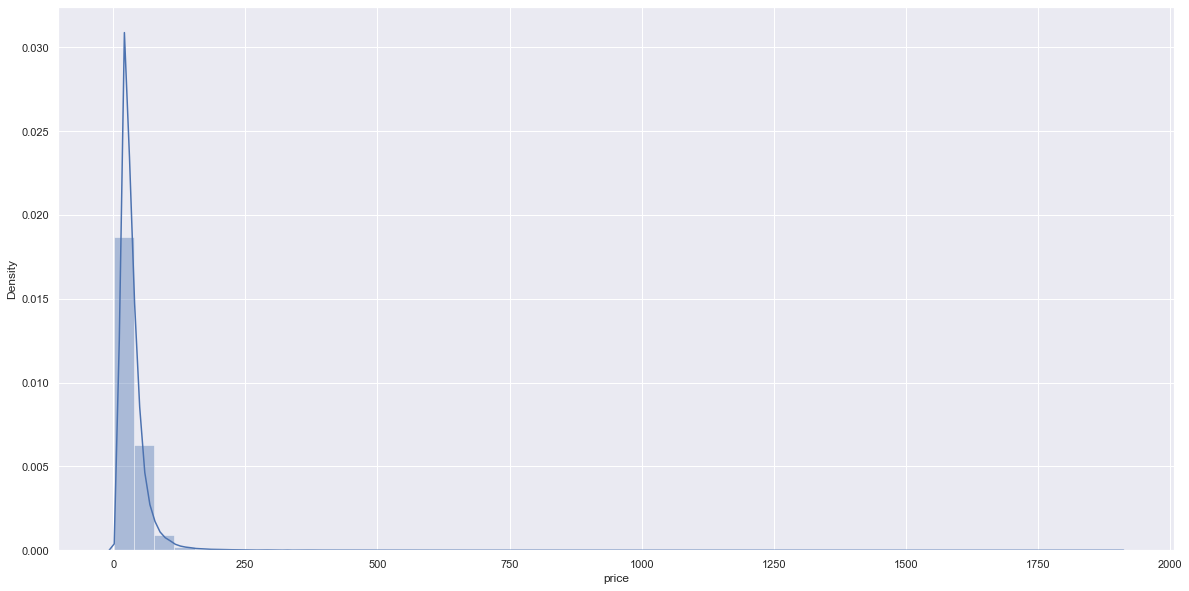

In [91]:
sns.distplot(df.price)
#this shows the data is right-skewed (long tail is in the right)

In [92]:
#because the data is skweed with allot of outliers I either replace with the mode or the median. Decided to replace with the mode
df["price"].fillna(df["price"].mode()[0],inplace=True)  #if things do not make sense, comment this line

Now let's see for the big dataset:

-the distribution of the number of wines per country

-the countries with the best scores

-the average scores by grape variety

-the distribution by decile

The client would like a specific zoom on the Pinot Noir variety.

<AxesSubplot:xlabel='Count', ylabel='country'>

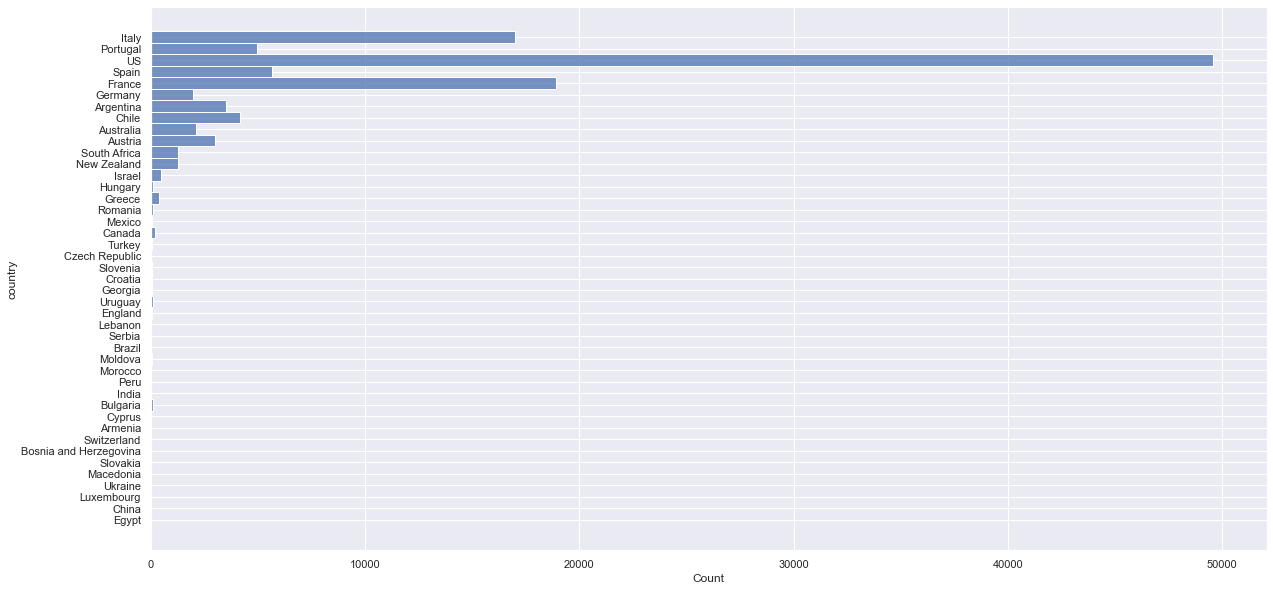

In [93]:
#only for pinot noir 
sns.set(rc = {'figure.figsize':(20,10)})
sns.histplot(data=df, y="country")

In [94]:
#for all wines
country_frq=pd.DataFrame(data=df["country"].value_counts()).reset_index()
country_frq["Frequency(%)"]= round((country_frq["country"]/df["country"].count())*100,3)
country_frq.rename(columns={"index":"Country", "country":"Total"}, inplace=True)
country_frq.head(11)

,Country,Total,Frequency(%)
0,US,49585,42.874
1,France,18896,16.339
2,Italy,17021,14.717
3,Spain,5659,4.893
4,Portugal,4963,4.291
5,Chile,4159,3.596
6,Argentina,3502,3.028
7,Austria,2996,2.591
8,Australia,2130,1.842
9,Germany,1978,1.710


In [95]:
country_points=df.pivot_table(values=["points","price"], index="country", aggfunc={"points":["mean","count"], "price":["mean","count"]})
country_points.sort_values(by=[("points", "mean"),("price","mean")], ascending=False).head(11)

points             price           
            count       mean  count       mean
country                                       
England        50  91.920000     50  45.620000
India           8  90.250000      8  23.125000
Austria      2996  90.149199   2996  31.419226
Germany      1978  89.902932   1978  40.221436
Hungary       127  89.377953    127  49.732283
Canada        225  89.311111    225  37.035556
China           1  89.000000      1  28.000000
Luxembourg      2  89.000000      2  23.000000
France      18896  88.883309  18896  35.221528
Morocco        24  88.708333     24  23.541667
Italy       17021  88.681805  17021  39.410963

In [96]:
variety_points=df.pivot_table(values="points", index="variety", aggfunc={"points":["mean", "count"]}).sort_values(by=["mean","count"], ascending=False)#.reset_index()
variety_points.head(26)

,count,mean
variety,,
Tinta del Pais,2,95.000000
Gelber Traminer,1,95.000000
Terrantez,1,95.000000
Bual,7,94.142857
Riesling-Chardonnay,1,94.000000
Sercial,1,94.000000
Blauburgunder,1,93.000000
Garnacha-Cariñena,1,93.000000
Ramisco,1,93.000000


In [97]:
print("Pinot Noir wine is in the top 25% in terms of mean pontuaction")
variety_points.reset_index(inplace=True)
position=variety_points[variety_points["variety"] == "Pinot Noir"]
position

Pinot Noir wine is in the top 25% in terms of mean pontuaction


,variety,count,mean
139,Pinot Noir,12131,89.43937


Now let's focus only on the Pinot Noir sample

In [98]:
df_pinot=df[df["variety"] == "Pinot Noir"]
df_pinot.shape[0]

12131

<AxesSubplot:xlabel='Count', ylabel='country'>

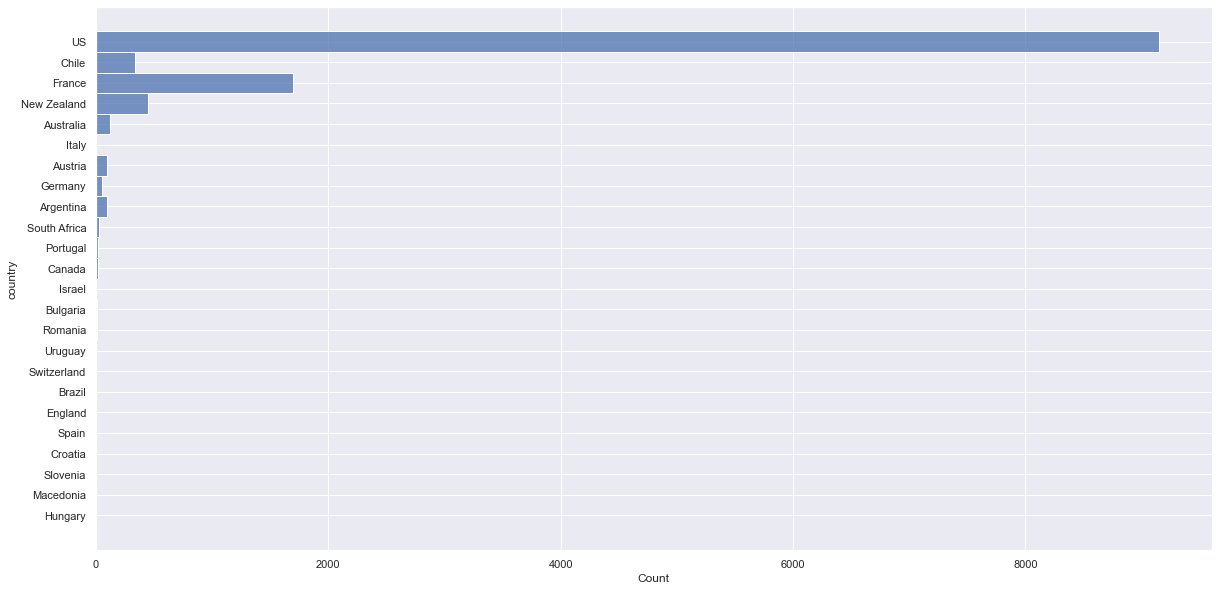

In [99]:
sns.histplot(data=df_pinot, y="country")

In [100]:
country_frq_pinot=pd.DataFrame(data=df_pinot["country"].value_counts()).reset_index()
country_frq_pinot["Frequency(%)"]= round((country_frq_pinot["country"]/country_frq_pinot["country"].sum())*100,3)
country_frq_pinot
country_frq_pinot.rename(columns={"index":"country", "country":"total"}, inplace=True)
country_frq_pinot.head(11)

,country,total,Frequency(%)
0,US,9146,75.412
1,France,1700,14.017
2,New Zealand,451,3.719
3,Chile,337,2.779
4,Australia,119,0.981
5,Argentina,97,0.800
6,Austria,93,0.767
7,Germany,53,0.437
8,South Africa,27,0.223
9,Canada,21,0.173


In [101]:
country_points_pinot=(df_pinot.pivot_table(values=["points","price"], index="country", aggfunc={"points":["mean","count"], "price":["mean","count"]})).sort_values(by=[("points", "mean"),("price","mean")], ascending=False)
print("There is a clear price premium associated to French Pinot Noir Wines. Probably some countries have a good reputation which allows them to charge a premium." + "\n" + "For example German Pinot Noir has the 6th higher score and is almost 4 euros more cheap than Portuguese wine" + "\n" + "A second factor to take into consideration is that the Pinot Noir grapes are originally from France, which likely positive moderates the price")
country_points_pinot.head(11)

There is a clear price premium associated to French Pinot Noir Wines. Probably some countries have a good reputation which allows them to charge a premium.
For example German Pinot Noir has the 6th higher score and is almost 4 euros more cheap than Portuguese wine
A second factor to take into consideration is that the Pinot Noir grapes are originally from France, which likely positive moderates the price


points            price            
              count       mean count        mean
country                                         
England           5  91.600000     5   41.000000
Austria          93  90.172043    93   35.505376
Hungary           1  90.000000     1   36.000000
France         1700  89.854118  1700   56.770000
US             9146  89.629893  9146   40.897879
Germany          53  89.471698    53   33.075472
Switzerland       2  89.000000     2  100.000000
South Africa     27  88.925926    27   34.925926
Canada           21  88.523810    21   30.571429
Portugal         17  88.470588    17   32.352941
New Zealand     451  88.341463   451   33.822616

Now that we now french wines are associated to a price premium it is time to see price evolution looking at historical data.
For the sake of the analysis we will look ate the last 10 years: from 2010 to 2020, inclusive

In [102]:
df['year'] = df['year'].astype(int)
country_years=df[(df["year"] >= 2005) & (df["year"] <= 2020) & (df["country"].str.contains("England|Austria|France|US|Germany|South Africa|Bulgaria|Canada|Portugal|Italy"))]
print("Retrieve French wines are becoming more cheaper. But not only French wines, the main competitor countries are also moving towards amore economic market. So this is not country spcecific, but industry specific")
country_years.pivot_table(values="price", index="country", columns="year", aggfunc="mean", fill_value=0)

Retrieve French wines are becoming more cheaper. But not only French wines, the main competitor countries are also moving towards amore economic market. So this is not country spcecific, but industry specific


year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,
Austria,46.375000,56.000000,45.428571,61.500000,52.064516,46.766667,35.870748,37.032609,32.429630,32.648485,30.666667,30.865789,32.218029,29.254902,26.429787,21.915094
Bulgaria,0.000000,0.000000,0.000000,0.000000,0.000000,15.714286,17.500000,27.000000,19.000000,28.800000,22.166667,23.142857,21.363636,21.000000,18.000000,15.600000
Canada,0.000000,66.666667,50.000000,37.000000,57.000000,47.000000,48.875000,52.000000,36.285714,50.200000,43.360000,36.291667,29.200000,26.214286,24.000000,14.875000
England,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,59.181818,50.333333,40.000000,38.823529,41.333333,34.000000,0.000000
France,55.096774,132.881356,55.615385,73.747967,63.088785,50.954023,50.072289,43.529018,44.437500,35.826043,33.211942,29.027834,30.835450,29.622582,22.631711,16.886270
Germany,130.000000,0.000000,58.333333,84.500000,46.945946,68.932039,49.662338,50.913043,72.855932,56.518868,45.211429,38.309211,32.400722,28.867435,27.955224,19.358974
Italy,66.378882,43.506329,62.053279,63.824621,51.744776,50.120879,46.438050,42.646635,39.936054,39.943396,37.435551,33.853890,30.571142,23.064922,20.583541,18.251880
Portugal,107.400000,44.750000,45.600000,42.378788,37.761905,30.043478,37.745098,34.768293,32.792023,27.698953,30.626594,26.864111,24.143670,20.834746,18.250000,15.649682
South Africa,29.000000,28.090909,51.875000,46.444444,39.190476,35.611111,32.542857,30.206897,29.563380,24.209790,25.886957,30.383333,29.781250,25.360465,19.142857,18.558140


In [103]:
country_years.pivot_table(values="points", index="country", columns="year", aggfunc="mean", fill_value=0)

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,
Austria,89.375000,89.250000,87.428571,89.285714,89.096774,89.458333,88.700680,89.619565,89.651852,90.181818,89.323718,90.194737,90.727463,90.678922,90.761702,90.056604
Bulgaria,0.000000,0.000000,0.000000,0.000000,0.000000,84.571429,84.000000,89.000000,86.333333,89.800000,87.916667,88.428571,88.454545,88.777778,88.217391,87.200000
Canada,0.000000,86.000000,90.000000,85.000000,91.000000,89.714286,87.750000,89.000000,89.000000,90.000000,89.680000,90.041667,89.488889,89.571429,90.250000,85.625000
England,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,92.000000,92.444444,89.000000,91.352941,92.333333,91.000000,0.000000
France,87.225806,92.118644,89.061538,90.065041,89.976636,89.670977,88.935241,89.631696,89.486506,89.144964,88.722431,88.776316,88.616402,88.915636,88.396393,87.204918
Germany,91.250000,0.000000,88.333333,94.000000,88.135135,89.825243,88.883117,89.913043,89.618644,90.339623,90.188571,90.029605,89.754513,89.936599,90.226866,88.846154
Italy,88.664596,87.607595,88.848361,89.895447,89.080597,89.148352,89.032498,88.654647,88.310204,88.609878,88.630991,88.822106,88.808951,87.908915,88.089776,87.830827
Portugal,88.700000,89.000000,89.640000,88.803030,89.028571,87.967391,89.163399,88.719512,89.034188,88.227749,89.142077,88.742160,88.314367,87.734463,87.342105,86.468153
South Africa,86.500000,87.090909,88.687500,88.166667,87.746032,87.875000,87.978571,87.750000,87.866197,87.251748,87.686957,89.116667,89.468750,89.372093,88.581633,89.302326


Text(0.5, 1.0, 'Price evolution in the top selling wine countries')

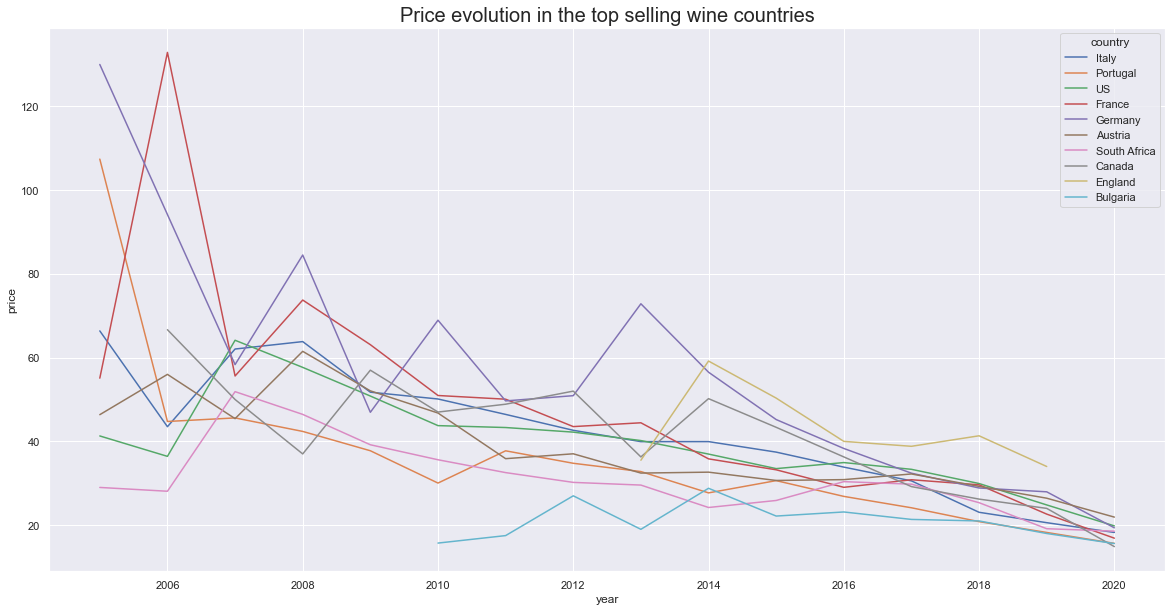

In [104]:
plot2=sns.lineplot(data=country_years, x="year", y="price", hue="country", ci=None )#.set(title="Price evolution in the top selling wine countries")
plot2.set_title("Price evolution in the top selling wine countries", fontsize=20)

Text(0.5, 1.0, 'Points evolution in the top selling wine countries')

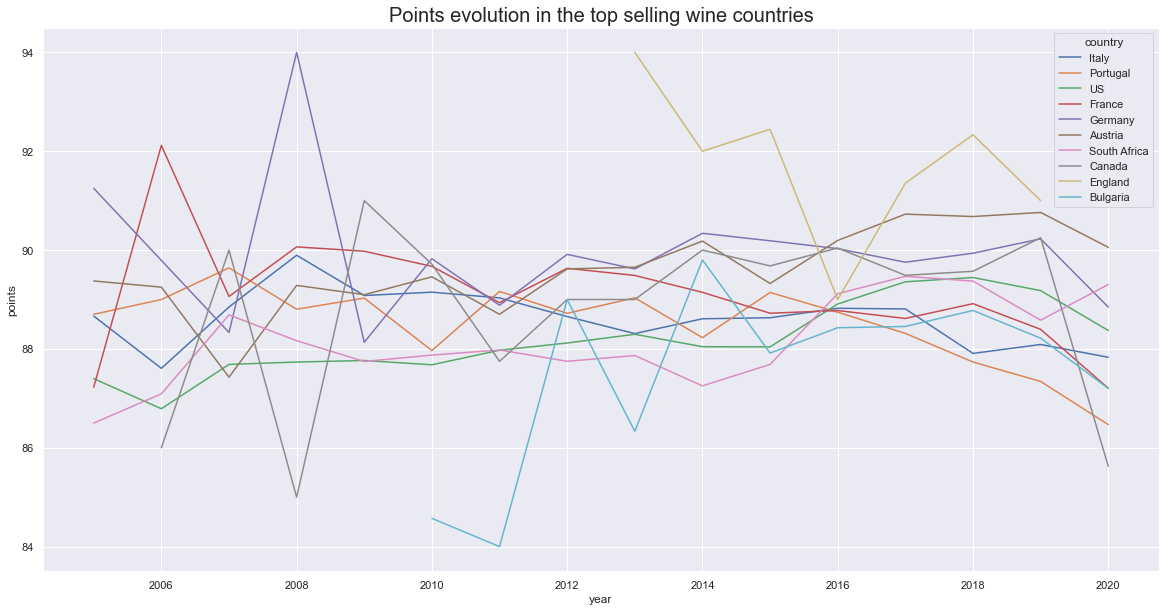

In [105]:
plot3=sns.lineplot(data=country_years, x="year", y="points", hue="country", ci=None)
plot3.set_title("Points evolution in the top selling wine countries", fontsize=20)

With expetion of South Africa, all countries decreased their mean value classification.
There is a market tendency for cheaper wines, nevertheless France shows with average premium prices. However when we segment such effect we understand is the influence of passed times, since until 2011 showed the highest prices. Nowadays that does not occur. 
Still in geographic segmentation, let's now look ate price and point evolution per French region 

In [106]:
df_france=df[(df["country"]=="France") & (df["year"] >= 2005) & (df["year"] <= 2020)]
df_france.head()
df_france.pivot_table(values="points", index="province", columns="year", aggfunc="mean", fill_value=0)

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
province,,,,,,,,,,,,,,,,
Alsace,88.000000,0.000000,89.000000,88.375000,88.000000,87.863636,89.111111,89.517241,88.372727,89.039548,88.752475,89.161702,89.321429,90.169540,90.605556,89.500000
Beaujolais,0.000000,0.000000,0.000000,0.000000,89.250000,88.882353,87.416667,86.454545,88.887324,87.970588,87.794872,87.562500,87.107843,87.663507,88.538462,87.150000
Bordeaux,90.500000,0.000000,87.100000,88.137931,90.180180,89.165414,89.023121,89.806691,90.187225,89.417740,88.205882,88.699735,87.841542,88.762120,87.240404,86.500000
Burgundy,0.000000,95.000000,90.750000,92.000000,91.086614,90.684492,89.859375,89.930131,89.463636,88.984615,89.547486,89.172414,89.815461,89.888418,89.474227,86.175439
Champagne,91.800000,93.125000,91.050000,92.687500,91.566038,92.901639,93.064516,92.852459,91.896552,91.695652,92.700000,93.444444,89.000000,88.000000,0.000000,0.000000
France Other,80.000000,91.000000,0.000000,83.000000,92.000000,87.875000,88.000000,87.000000,87.315789,88.125000,87.250000,87.360000,86.941176,87.076923,86.105263,86.139535
Languedoc-Roussillon,82.428571,84.333333,88.000000,87.454545,87.129032,86.535714,86.891304,88.172414,87.169492,86.574074,89.178571,87.850000,87.354839,87.475000,85.828571,86.333333
Loire Valley,87.000000,91.000000,91.333333,90.500000,88.904762,88.171429,87.511628,90.018182,89.295455,89.600000,89.056180,88.248619,88.050279,88.467914,88.483740,87.261905
Provence,81.000000,0.000000,88.666667,89.000000,86.818182,87.590909,87.878049,87.727273,88.250000,88.619718,88.283333,88.119048,88.545455,88.049261,88.334928,88.110599


Text(0.5, 1.0, 'Point evolution per French Province')

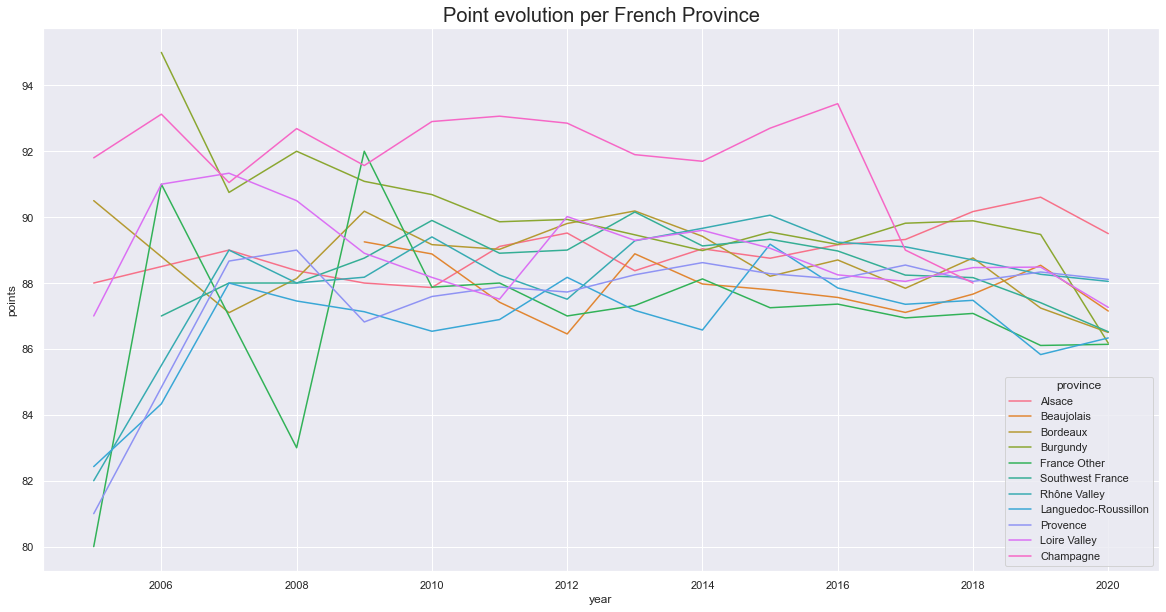

In [107]:
plot4=sns.lineplot(data=df_france, x="year", y="points", hue="province", ci=None )#.set(title="Price evolution in the top selling wine countries")
plot4.set_title("Point evolution per French Province", fontsize=20)

Text(0.5, 1.0, 'Price evolution per French Province')

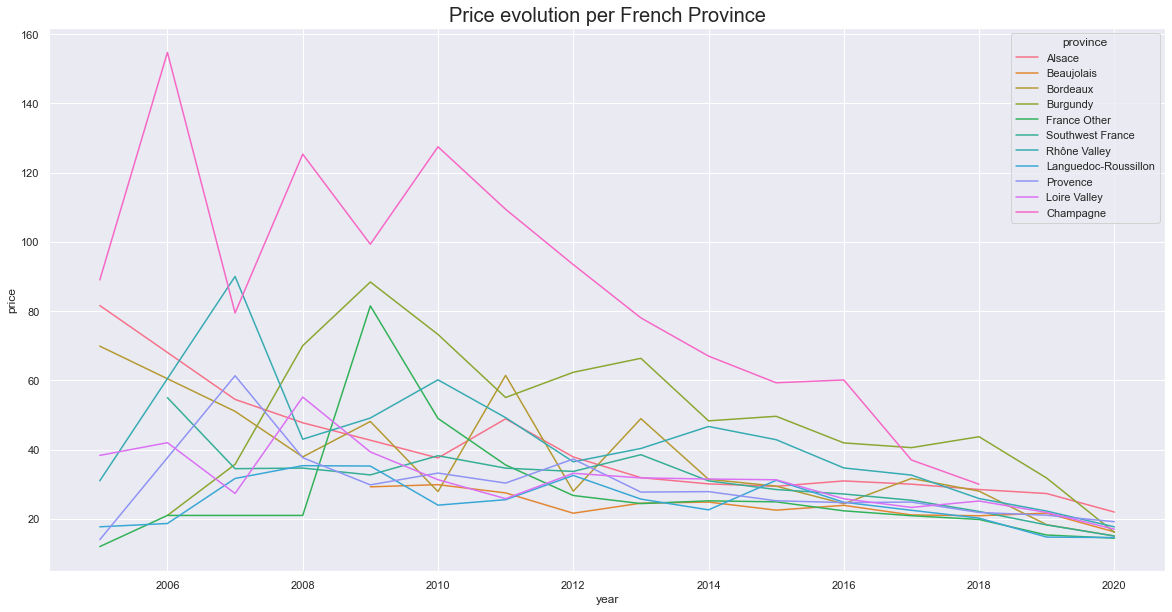

In [108]:
df_france.pivot_table(values="points", index="province", columns="year", aggfunc="mean", fill_value=0)
plot5=sns.lineplot(data=df_france, x="year", y="price", hue="province", ci=None )#.set(title="Price evolution in the top selling wine countries")
plot5.set_title("Price evolution per French Province", fontsize=20)

By comparing this 2 plots it has become clear that regions may have higher points associated but it does not translate into premium prices. The region of Champagne displays such effect, from 2014-2016 there was a significant increase in points (associated with quality) and it did not lead to an increase in price. 
In fact the wines from Burgandy are the most expensive, however the price is following a downward trend.
Let's now focus only on the region of Burgundy and look into the variety of grapes.

C:\Users\joana\AppData\Local\Temp\ipykernel_18120\2009558444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bur["price"].fillna(df_bur["price"].median(),inplace=True)


Text(0.5, 1.0, 'Point evolution per grape variety')

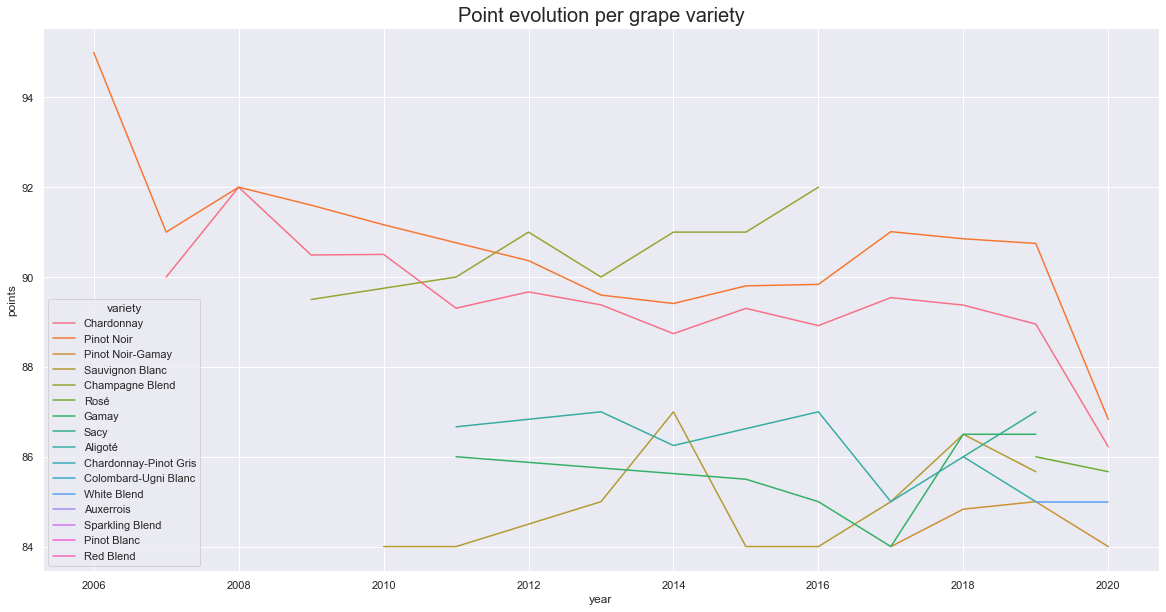

In [109]:
df_bur=df[(df["province"]=="Burgundy") & (df["year"] >= 2005) & (df["year"] <= 2020)]
df_bur["price"].fillna(df_bur["price"].median(),inplace=True)
df_bur.pivot_table(values="points", index="variety", columns="year", aggfunc="mean")
plot6=sns.lineplot(data=df_bur, x="year", y="points", hue="variety", ci=None )#.set(title="Price evolution in the top selling wine countries")
plot6.set_title("Point evolution per grape variety", fontsize=20)

Text(0.5, 1.0, 'Price evolution per grape variety')

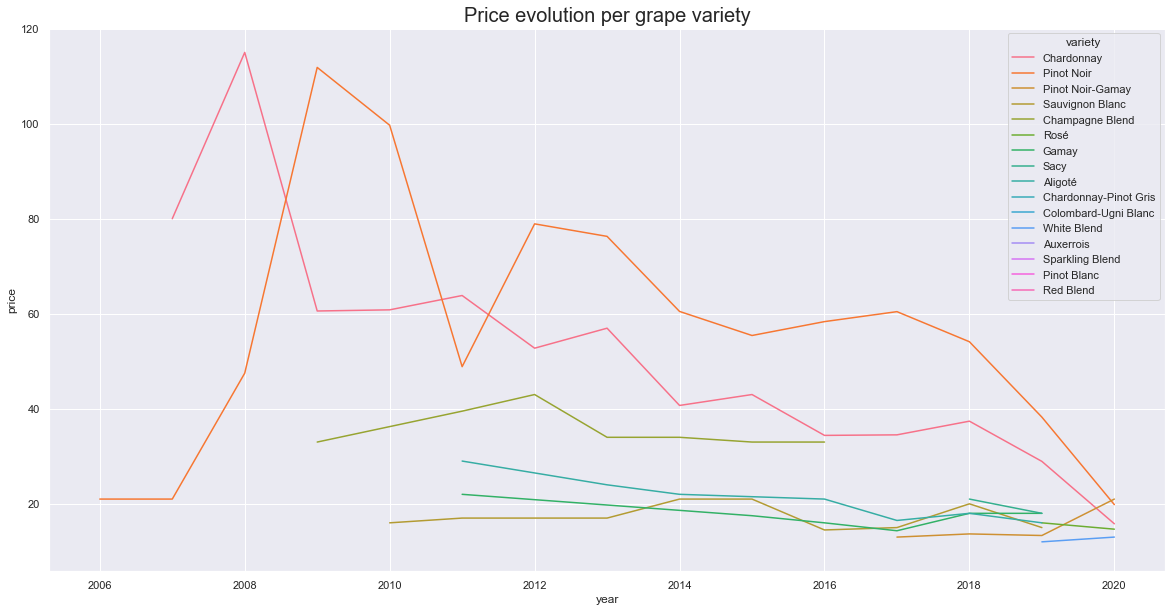

In [110]:
plot7=sns.lineplot(data=df_bur, x="year", y="price", hue="variety", ci=None )#.set(title="Price evolution in the top selling wine countries")
plot7.set_title("Price evolution per grape variety", fontsize=20)

In [111]:
#plot8=sns.lineplot(data=df_bur, x="year", y="price", hue="region_1", ci=None )#.set(title="Price evolution in the top selling wine countries")
#plot8.set_title("Price evolution per region", fontsize=20)

Conclusion:

There is an overall market tendency for cheaper wines, either when we segment the market by country and region. However the quality of the wines (acessed via the points metric) decreased from 2018/2019. Which may indicate that overall it is not something specific from a grape variety but an industry "problem". Possible explanations: 
-  effect of global warming may jeoperdize the quality of production 
- consumer are more price senstive 

It is to point out that although prices decreased, the region of Burgundy is the one with highest price from 2017-2018 and before such period was always in the top3 French regions with most expensive wines. This means the wines from Burgundy should have a higher price in comparison to other french areas with exeption of Champagne. Nevertheless, the region of Champagne is well-consider for its champagne and not red wine, meaning that the consumer when purchases a wine fro Burgandy will not consider a champagne in its decision basket. So the Champagne region can be used as superior price benchmark.

In order backbone such inferences it would be good to conduct a survey in order to understand what is the need/want the consumer has when purchasing a wine from Burgandy vs Champagne vs Bordeux (e.g. celebration? dinner/lunch out? regular product at home?)


When we segment the market based on the grape variety we see the Pinot Noir is in a downfall, as all other grape varieties are with exeption for "Pinot Noir-Gamay". This grape is the only one which sells at a higher level than Pinot Noir wines from France, so this is defently a wine to consider match the price:40 €. 
It would be interesting to understand if because is a"novel"  grape if consumers find it more attractive to buy (e.g., want to taste a new flavour or is the packaging and a spcific marketing campaign). At this stage i would look at "pinot noir-gamay" brands are doing to retrieve good practices (e.g., packaging? sustainable production?...)

Because the point is to sell in the american market i do believe Pinot Noir wines can take advatage of their "foreign" production, particullary because the region of Burgandy (where our client is) is the tradional area of Pinot Noir wine. So american consumers can perceive that as an "extra", as a prof of quality. Aditionally, although wine prices are decreasing the Pinot Noir shows higher prices so they should target for a price increase particullary now that countries are open-up and people are going back to travel, consume, go out...So i would advice to increase the price gradually and follow a price premium strategy where the focus is not to sell allot of units but to sell with a proper premium to retrieve an attractive margin. Final price: 40-43 euros

Overall, beyond the survey to better understand what boost the consumer to purchase it wouldbe interesting to retrieve media usage and psycographic characteristics of the Pinot Noir consumer. This way it would be easier to find and reach the consumer, but also to develop a marketing towards the wine aligned with the consumer personality/hoobies/life-style. 
Finall i would also retrieve the number of units consumed per wines to plot a consumption function and consequently to understand consumer price elasticity to adjust the price via promotions (e.g., direct promotions). 

